###Data Preprocessing

As said before, we intend to normalize and truncate our dataset to 547 for each emotion (which still comes out to be a hefty 3829 images). Normalizing will ensure optimal comparisons and truncating the dataset will make computations inherently faster. We also intend to DROP the emotion and usage categories in order to find our own classifications.</br>

**If you already have 'face-emo.csv', please skip to the Normalizing step and use Runtime > Run after**


In [333]:
#Necessary libraries for this section
import pandas as pd
import numpy as np
import seaborn as sns

Getting the base unpreprocessed dataset

In [334]:
df = pd.read_csv('fer2013.csv')
print(df)

       emotion                                             pixels        Usage
0            0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...     Training
1            0  151 150 147 155 148 133 111 140 170 174 182 15...     Training
2            2  231 212 156 164 174 138 161 173 182 200 106 38...     Training
3            4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...     Training
4            6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...     Training
...        ...                                                ...          ...
35882        6  50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...  PrivateTest
35883        3  178 174 172 173 181 188 191 194 196 199 200 20...  PrivateTest
35884        0  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...  PrivateTest
35885        3  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...  PrivateTest
35886        2  19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...  PrivateTest

[35887 rows x 3 columns]


Truncation script to get 547 images from each emotion

In [335]:
LIMIT = 547

def isLimit(map):
    for key in map:
        if map[key] < LIMIT:
            return False
    return True

def saveData(data):
    with open('face-emo.csv', 'w') as file:
        file.writelines(data)
    print("data saved under face-emo.csv")
    return


"""
    { 0: "Angry", 1: "Disgust", 2: "Fear", 3: "Happy", 4: "Sad", 5: "Surprize", 6: "Neutral" }

    This function is used to balance the data between emotions so we have an
    even number of pixels for each categories. The new data is saved in a new
    file called face-emo.csv.

    TODO: We might need to remove the Usage Column
"""
def fetch_data():
    data = []
    classes = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0}

    with open('fer2013.csv', 'r') as file:
        data.append(file.readline())

        for line in file:
            emo = int(line.split(',')[0])

            if classes[emo] != LIMIT:
                data.append(line)
                classes[emo] += 1

            if isLimit(classes) == True:
                break

        print(classes)

        # print(f"length of data should equal 547 * 7. data = {len(data) - 1} == {547 * 7}")
        # Saving new data
        saveData(data)

    return


if __name__ == "__main__":
    fetch_data()

{0: 547, 1: 547, 2: 547, 3: 547, 4: 547, 5: 547, 6: 547}
data saved under face-emo.csv


Save it under face-emo.csv

In [336]:
truncatedDf = pd.read_csv('face-emo.csv')
print(truncatedDf)

      emotion                                             pixels        Usage
0           0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...     Training
1           0  151 150 147 155 148 133 111 140 170 174 182 15...     Training
2           2  231 212 156 164 174 138 161 173 182 200 106 38...     Training
3           4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...     Training
4           6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...     Training
...       ...                                                ...          ...
3824        1  48 34 21 18 16 21 26 36 40 44 53 57 64 82 95 9...  PrivateTest
3825        1  98 103 107 105 100 103 108 112 110 109 109 112...  PrivateTest
3826        1  247 247 247 246 252 224 150 215 207 202 197 19...  PrivateTest
3827        1  186 146 50 42 43 35 48 93 124 146 167 168 170 ...  PrivateTest
3828        1  58 83 97 101 104 105 107 107 107 108 108 107 1...  PrivateTest

[3829 rows x 3 columns]


Normalizing Step **(skip here if you uploaded face-emo.csv)**

In [337]:
#normalizing pixel data of our data frame

from sklearn.preprocessing import MinMaxScaler

#each pixel entry in the data frame is of type string, so first we must convert them into a list of arrays
#function to convert string into array of numbers
def string_to_array(numbers_string):
    number_strings = numbers_string.split()
    numbers_array = np.array([float(number) for number in number_strings])
    return numbers_array

# Apply the function to the DataFrame column
truncatedDf['pixels'] = truncatedDf['pixels'].apply(string_to_array)


#drop the unnecessary columns (label column and column with string data)
pixelnormdf = truncatedDf.drop(columns =['emotion', 'Usage'])

print(pixelnormdf)

scaler = MinMaxScaler()

#since minmax scalar only works on one value, we must iterate over the array in each row of number in the data frame
for i, row in pixelnormdf.iterrows():
    scaled_array = scaler.fit_transform(np.array(row['pixels']).reshape(-1, 1))
    pixelnormdf.loc[i, 'pixels'] = scaled_array.flatten()

print(pixelnormdf)

                                                 pixels
0     [70.0, 80.0, 82.0, 72.0, 58.0, 58.0, 60.0, 63....
1     [151.0, 150.0, 147.0, 155.0, 148.0, 133.0, 111...
2     [231.0, 212.0, 156.0, 164.0, 174.0, 138.0, 161...
3     [24.0, 32.0, 36.0, 30.0, 32.0, 23.0, 19.0, 20....
4     [4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
...                                                 ...
3824  [48.0, 34.0, 21.0, 18.0, 16.0, 21.0, 26.0, 36....
3825  [98.0, 103.0, 107.0, 105.0, 100.0, 103.0, 108....
3826  [247.0, 247.0, 247.0, 246.0, 252.0, 224.0, 150...
3827  [186.0, 146.0, 50.0, 42.0, 43.0, 35.0, 48.0, 9...
3828  [58.0, 83.0, 97.0, 101.0, 104.0, 105.0, 107.0,...

[3829 rows x 1 columns]
                                                 pixels
0     [0.2964824120603015, 0.34673366834170855, 0.35...
1     [0.6894977168949772, 0.684931506849315, 0.6712...
2     [0.9058823529411765, 0.8313725490196078, 0.611...
3     [0.053811659192825115, 0.08968609865470852, 0....
4     [0.01659751037344

And like that, we have a truncated dataset with normalized pixel values saved under our main df

In [338]:
df = pixelnormdf
print(df)

                                                 pixels
0     [0.2964824120603015, 0.34673366834170855, 0.35...
1     [0.6894977168949772, 0.684931506849315, 0.6712...
2     [0.9058823529411765, 0.8313725490196078, 0.611...
3     [0.053811659192825115, 0.08968609865470852, 0....
4     [0.016597510373443983, 0.0, 0.0, 0.0, 0.0, 0.0...
...                                                 ...
3824  [0.2568306010928962, 0.18032786885245902, 0.10...
3825  [0.41013824884792627, 0.43317972350230416, 0.4...
3826  [0.9658119658119658, 0.9658119658119658, 0.965...
3827  [0.9180327868852459, 0.6994535519125683, 0.174...
3828  [0.24590163934426232, 0.3825136612021858, 0.45...

[3829 rows x 1 columns]


###Model Building and Silhouette Scores

In [339]:
#Necessary libraries for this section
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

Make sure we have a preprocessed dataset (if not, go to section above)



In [340]:
df = pixelnormdf
print(df)

                                                 pixels
0     [0.2964824120603015, 0.34673366834170855, 0.35...
1     [0.6894977168949772, 0.684931506849315, 0.6712...
2     [0.9058823529411765, 0.8313725490196078, 0.611...
3     [0.053811659192825115, 0.08968609865470852, 0....
4     [0.016597510373443983, 0.0, 0.0, 0.0, 0.0, 0.0...
...                                                 ...
3824  [0.2568306010928962, 0.18032786885245902, 0.10...
3825  [0.41013824884792627, 0.43317972350230416, 0.4...
3826  [0.9658119658119658, 0.9658119658119658, 0.965...
3827  [0.9180327868852459, 0.6994535519125683, 0.174...
3828  [0.24590163934426232, 0.3825136612021858, 0.45...

[3829 rows x 1 columns]


Splitting data into training and testing sets




In [341]:
ratio = int(0.9 * len(df)) #Will just make this our ratio

normalizedValues = np.stack(df['pixels'].values)

training_set, testing_set = train_test_split(normalizedValues, test_size=0.1, random_state = 42)

This function check the silhouette score for different values assigned to clusters

In [342]:
def apply_silhouette(X, min_clusters, max_clusters):
  scores = []

  for n_clust in range(min_clusters, max_clusters + 1):
      kmeans = KMeans(n_clusters=n_clust, random_state=42)
      labels = kmeans.fit_predict(X)

      #print(kmeans.inertia_)

      score = silhouette_score(X, labels)
      scores.append(score)
  return scores

Checking the silhouette score using K means with the SVD approach

In [343]:
#checking silhouette score using SVD method
n_components = 2

svd = TruncatedSVD(n_components = n_components)

train_svd = svd.fit_transform(training_set)
#test_svd = svd.fit_transform(testing_set)

kmeans_svd = KMeans(n_clusters=7, random_state=42).fit(train_svd)

train_cluster_labels_svd = kmeans_svd.labels_

#test_cluster_labels_svd = kmeans_svd.predict(test_svd)

score_svd = silhouette_score(train_svd, train_cluster_labels_svd)
#score_svd = silhouette_score(test_svd, test_cluster_labels_svd)

print("Silhouette score using SVD: ", score_svd)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score using SVD:  0.33141524204342515


Checking the silhouette score using K means with the PCA approach

In [344]:
#checking silhouette score using PCA method

n_components = 2
pca = PCA(n_components=n_components)
train_pca = pca.fit_transform(training_set)
test_pca = pca.fit_transform(testing_set)

kmeans_pca = KMeans(n_clusters=7, random_state=42).fit(train_pca)

train_cluster_labels_pca = kmeans_pca.labels_

test_cluster_labels_pca = kmeans_pca.predict(test_pca)

score_pca = silhouette_score(train_pca, train_cluster_labels_pca)

print("Silhouette score using PCA: ", score_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score using PCA:  0.3361495382393345


Clusters Plot without Centroids

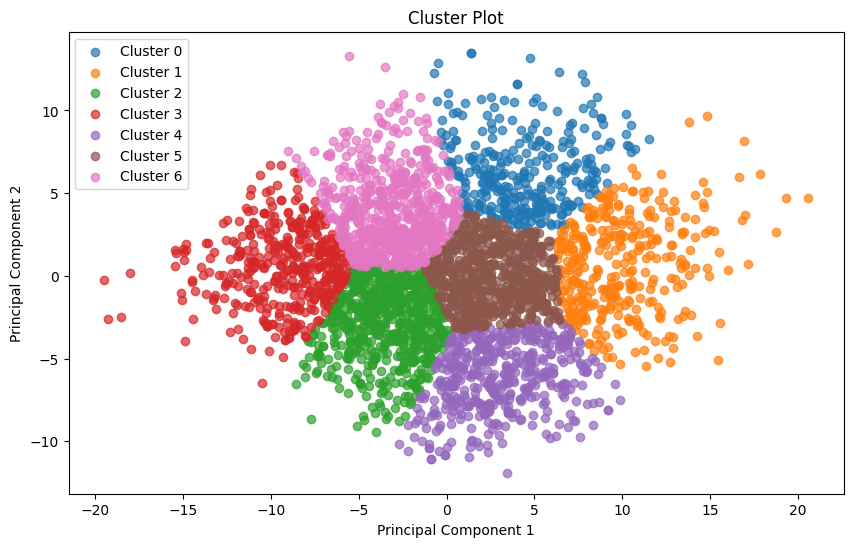

In [345]:
plt.figure(figsize=(10, 6))
for cluster_id in range(max(kmeans_pca.labels_) + 1):
    plt.scatter(
        train_pca[kmeans_pca.labels_ == cluster_id, 0],
        train_pca[kmeans_pca.labels_ == cluster_id, 1],
        label=f'Cluster {cluster_id}',
        alpha=0.7
    )

plt.title('Cluster Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

Clusters Plot with Centroids

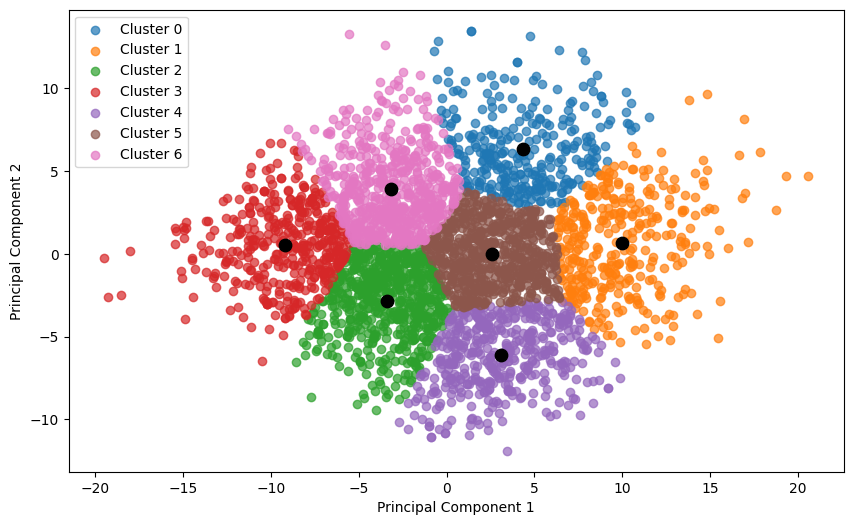

In [346]:
centroids = kmeans_pca.cluster_centers_

plt.figure(figsize=(10, 6))

for cluster_id in range(max(kmeans_pca.labels_) + 1):

    plt.scatter(
        train_pca[kmeans_pca.labels_ == cluster_id, 0],
        train_pca[kmeans_pca.labels_ == cluster_id, 1],
        label=f'Cluster {cluster_id}',
        alpha=0.7
    )



plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

Function for applying cross validation

In [347]:
''' function -> Use cross validation and check the model score '''
from sklearn.model_selection import cross_val_score, KFold
def apply_cross_validation(kmeans, X):
  k_fold = KFold(n_splits=10, shuffle=True, random_state=21)

  scores = []

  count = 1


  for train_index, test_index in k_fold.split(X):
    X_train, X_test = X[train_index], X[test_index]

    kmeans.fit(X_train)

    score = silhouette_score(X_train, kmeans.labels_)

    print("Iteration %d -> score = %.2f" % (count, score))

    scores.append(score)

    count += 1


  print("\nAverage Report: ")
  print("Silhouette avg: %.2f" % (np.mean(scores)))

Function for getting optimal parmeters

In [348]:
''' function -> Make a function for finding the right number of n_component and n_clusters arugument '''
def optimized_params(comp_range, cluster_range, data):
  param = {'n_components': 0, 'n_clusters': 0, 'score': -100, 'data_pca': None, 'training_set': None}
  model = None
  kmeans_args = {
       "init": "random",
       "n_init": 10,
       "max_iter": 300,
       "random_state": 42,
  }

  training_set, testing_set = train_test_split(data, test_size=0.1, random_state = 42)
  max_score = -100

  for n_components in range(comp_range[0], comp_range[1]+1):
    for n_clusters in range(cluster_range[0], cluster_range[1]+1):
      pca = PCA(n_components=n_components)
      X_pca = pca.fit_transform(training_set)

      kmeans = KMeans(n_clusters=n_clusters,**kmeans_args)
      kmeans.fit(X_pca)

      score = silhouette_score(X_pca, kmeans.labels_)


      if score > max_score:
        max_score = score
        param['n_components'] = n_components
        param['n_clusters'] = n_clusters
        param['score'] = score
        param['data_pca'] = X_pca
        param['training_set'] = training_set
        model = kmeans




  return model, param


Getting the optimal parameters and then applying cross validation

In [349]:
model, parameters = optimized_params([2, 5], [5, 15], normalizedValues)


apply_cross_validation(model, parameters['data_pca'])

Iteration 1 -> score = 0.33
Iteration 2 -> score = 0.33
Iteration 3 -> score = 0.34
Iteration 4 -> score = 0.34
Iteration 5 -> score = 0.34
Iteration 6 -> score = 0.34
Iteration 7 -> score = 0.34
Iteration 8 -> score = 0.34
Iteration 9 -> score = 0.34
Iteration 10 -> score = 0.34

Average Report: 
Silhouette avg: 0.34


###Plotting from each cluster

Plotting 5 random images from each cluster

[0 1 2 3 4 5 6]
   Cluster                                       Pixel Arrays
0        0  [[13.0, 13.0, 20.176470588235293, 36.682352941...
1        1  [[37.991189427312776, 42.02202643171806, 47.66...
2        2  [[85.98214285714286, 85.98214285714286, 85.982...
3        3  [[34.81456953642384, 27.543046357615893, 25.11...
4        4  [[180.15584415584414, 180.15584415584414, 180....
5        5  [[196.00000000000003, 195.19026548672565, 192....
6        6  [[87.1891891891892, 84.71621621621621, 84.7162...


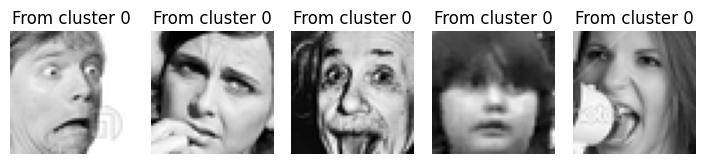

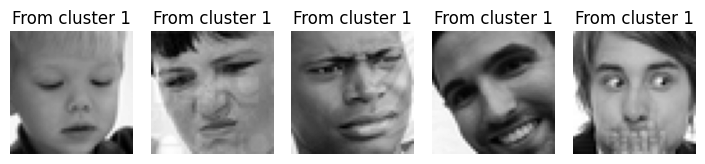

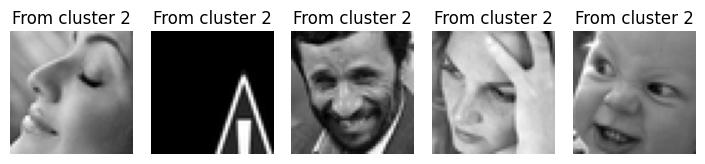

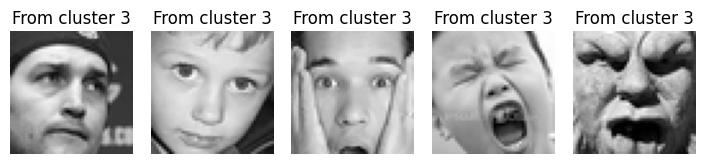

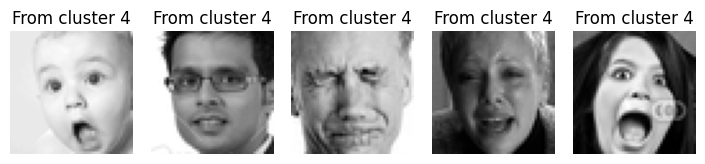

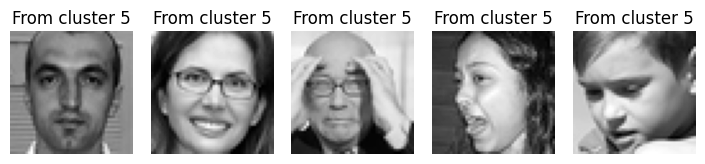

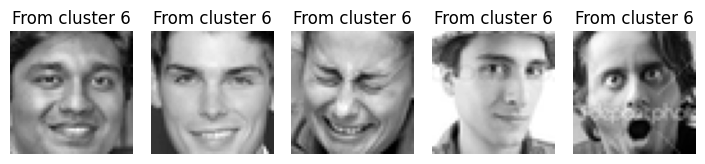

In [350]:
#plot images from each cluster to identify classes

# print(parameters['training_set'])
# print(model.labels_)

scaler_reverse = scaler.inverse_transform(parameters['training_set'])
#print(scaler_reverse)

pixel_values = scaler_reverse

cluster = model.labels_

print(np.unique(cluster))

list_of_tuples = list(zip(pixel_values, cluster))

plotting_df = pd.DataFrame(list_of_tuples, columns = ['Pixel Values', 'Cluster'])

#print(plotting_df)

grouped_df = plotting_df.groupby('Cluster')['Pixel Values'].apply(list).reset_index(name='Pixel Arrays')

print(grouped_df)


# Function to plot images
def plot_images(images, whichCluster):
    plt.figure(figsize=(10, 10))
    for i, img in enumerate(images):
        plt.subplot(7, 7, i + 1)
        plt.imshow(np.array(img).reshape(48,48), cmap='gray')
        plt.axis('off')
        plt.title("From cluster " + str(whichCluster))
    plt.tight_layout()
    plt.show()

# Plot 10 random images from each cluster
for _, row in grouped_df.iterrows():
    cluster_images = row['Pixel Arrays']
    random_indices = np.random.choice(len(cluster_images), size=min(5, len(cluster_images)), replace=False)
    random_images = [cluster_images[i] for i in random_indices]
    plot_images(random_images, row['Cluster'])


Plotting 5 images that are closest to each cluster's centroid

Minimum distances are: [0.635085152305537, 1.1101888955210786, 0.4271603801956178, 1.3715408291678604, 1.2922428420618886]
Indexes are located at: [23, 63, 133, 291, 372]


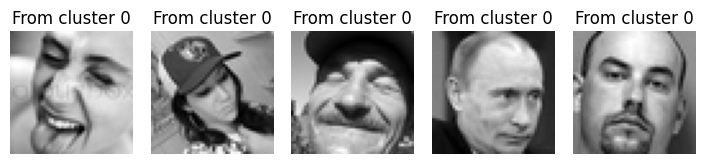

Minimum distances are: [1.3077934682750203, 1.2105347823943822, 1.3887630327165317, 0.6946892488667779, 1.4168425533326738]
Indexes are located at: [1, 101, 175, 215, 226]


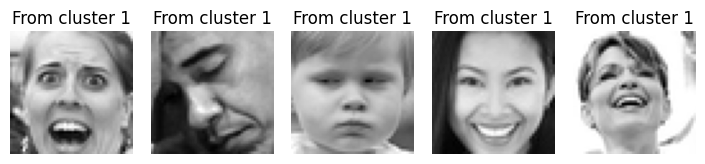

Minimum distances are: [0.6728399881018868, 0.5619805851254505, 0.680978413529843, 0.12371434019385887, 0.6850198118113]
Indexes are located at: [26, 80, 107, 222, 392]


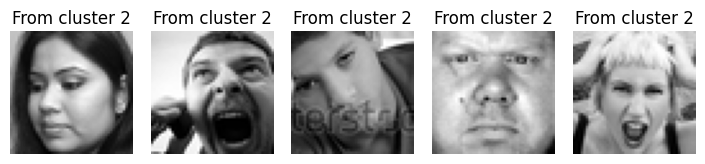

Minimum distances are: [0.7408027298576412, 0.662431146596615, 0.5957310013931556, 0.793159465731719, 0.7660893903642695]
Indexes are located at: [139, 234, 251, 411, 445]


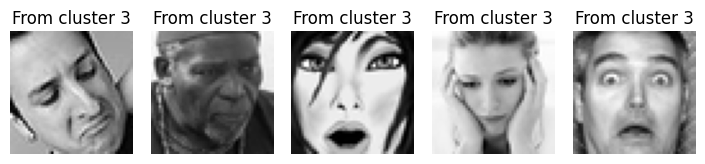

Minimum distances are: [0.8671291721118206, 0.8908250996460471, 0.6781748125703538, 1.5467243393388432, 1.1240951528434777]
Indexes are located at: [5, 59, 102, 137, 239]


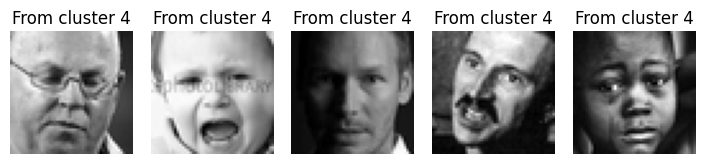

Minimum distances are: [0.8421079981875152, 0.4636738426534126, 0.7991087443868569, 0.3518767235737053, 0.71757334216991]
Indexes are located at: [106, 150, 151, 250, 266]


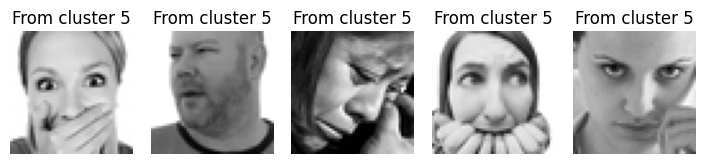

Minimum distances are: [0.3579875260892914, 1.3003346135333498, 0.47537779198955, 0.566377678071323, 0.9181577400275236]
Indexes are located at: [18, 88, 207, 248, 270]


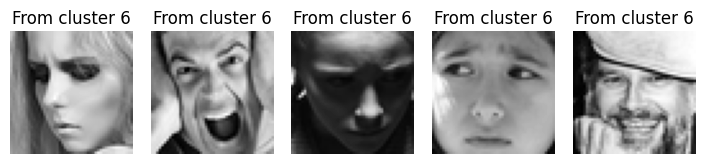

In [351]:
from pickleshare import print_function
from sklearn.metrics import pairwise_distances_argmin
import math



# Function to plot images
def plot_images(images, whichCluster):
    plt.figure(figsize=(10, 10))
    for i, img in enumerate(images):
        plt.subplot(7, 7, i + 1)
        plt.imshow(np.array(img).reshape(48,48), cmap='gray')
        plt.axis('off')
        plt.title("From cluster " + str(whichCluster))
    plt.tight_layout()
    plt.show()

#Returns an array
def findClosestToCentroid(centroidForRow, pixelArrayForRow):
  indexArray = [9999, 9999, 9999, 9999, 9999]
  distanceArray = [9999, 9999, 9999, 9999, 9999]
  for i in range(len(pixelArrayForRow)):
    distance = math.dist(centroidForRow, train_pca[i])

    #If the distance is smaller than the worst distance, we must repopulate
    #the index array by taking out the worst
    if (distance < max(distanceArray)):
      distanceArray[pd.Series(distanceArray).idxmax()] = distance

  indexArrayiterator = 0
  for i in range(len(pixelArrayForRow)):
    for j in range(len(distanceArray)):
      if math.dist(centroidForRow, train_pca[i]) == distanceArray[j]:
        indexArray[indexArrayiterator] = i
        indexArrayiterator = indexArrayiterator + 1


  print("Minimum distances are:",distanceArray)
  print("Indexes are located at:",indexArray)
  return indexArray

#Important
centroids = kmeans_pca.cluster_centers_

# Plot 5 images that are closest to each cluster centroid
for _, row in grouped_df.iterrows():
    cluster_images = row['Pixel Arrays']
    indices = findClosestToCentroid(centroids[row['Cluster']], row['Pixel Arrays'])
    #random_indices = np.random.choice(len(cluster_images), size=min(5, len(cluster_images)), replace=False)
    images = [cluster_images[i] for i in indices]
    plot_images(images, row['Cluster'])


Unfortunately, images that are closest to each cluster centroid don't seem to follow a particular pattern, neither when we randomize which ones to display.

Model must improve in some way.

###Model Evaluation

**Conclusion text**